In [195]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error,classification_report
from sklearn.linear_model import LogisticRegression

In [197]:
df = pd.read_csv('/content/drive/MyDrive/Database/employee.csv')
df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31.0,Male,19.0,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59.0,Female,4.0,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24.0,Female,10.0,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36.0,Female,7.0,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56.0,Male,41.0,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,37195,50.0,Female,NaN,Education,4414,Fair,High,Average,1,...,2,Senior,Small,NaN,No,No,Yes,Poor,Very High,Left
59594,6266,18.0,Male,NaN,Healthcare,8040,Fair,High,High,3,...,0,Senior,Medium,NaN,No,No,No,Fair,Medium,Left
59595,54887,22.0,Female,14.0,Technology,7944,Fair,High,High,0,...,2,Entry,Small,29.0,No,Yes,No,Good,Medium,Stayed
59596,861,23.0,Male,8.0,Education,2931,Fair,Very High,Average,0,...,0,Entry,Large,9.0,No,No,No,Good,Low,Left


In [198]:
df.isnull().sum()

,0
Employee ID,0
Age,72
Gender,0
Years at Company,57
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,0


In [199]:
mode_value = df['Age'].mode()[0]
mode_value

34.0

In [200]:
df['Age'] = df['Age'].fillna(mode_value)

In [201]:
mode_value = df['Years at Company'].mode()[0]
df['Years at Company'] = df['Years at Company'].fillna(mode_value)

In [202]:
mode_value = df['Company Tenure'].mode()[0]
df['Company Tenure'] = df['Company Tenure'].fillna(mode_value)

In [203]:
df.isnull().sum()

,0
Employee ID,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,0


In [204]:
df_copy = df.copy()

In [205]:
df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31.0,Male,19.0,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59.0,Female,4.0,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24.0,Female,10.0,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36.0,Female,7.0,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56.0,Male,41.0,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,37195,50.0,Female,5.0,Education,4414,Fair,High,Average,1,...,2,Senior,Small,55.0,No,No,Yes,Poor,Very High,Left
59594,6266,18.0,Male,5.0,Healthcare,8040,Fair,High,High,3,...,0,Senior,Medium,55.0,No,No,No,Fair,Medium,Left
59595,54887,22.0,Female,14.0,Technology,7944,Fair,High,High,0,...,2,Entry,Small,29.0,No,Yes,No,Good,Medium,Stayed
59596,861,23.0,Male,8.0,Education,2931,Fair,Very High,Average,0,...,0,Entry,Large,9.0,No,No,No,Good,Low,Left


In [206]:
df['Gender'].value_counts()

,count
Gender,
Male,32739
Female,26859


In [207]:
# Define the mapping dictionary
gender_mapping = {
    'Male': 1,
    'Female': 2,
}

# Apply the mapping
df['Gender'] = df['Gender'].map(gender_mapping)

In [208]:
df['Job Role'].value_counts()

,count
Job Role,
Technology,15507
Healthcare,13642
Education,12490
Media,9574
Finance,8385


In [209]:
# Define the mapping dictionary
Job_Role = {"Technology":4,"Healthcare":3,"Education":2,"Media":1,"Finance":0}

# Apply the mapping
df['Job Role'] = df['Job Role'].map(Job_Role)

In [210]:

df['Work-Life Balance'].value_counts()

,count
Work-Life Balance,
Good,22528
Fair,18046
Excellent,10719
Poor,8305


In [211]:
# Define the mapping dictionary
Work_Life_Balance = {"Good":3,"Fair":2,"Excellent":1,"Poor":0}

# Apply the mapping
df['Work-Life Balance'] = df['Work-Life Balance'].map(Work_Life_Balance)

In [212]:

df['Job Satisfaction'].value_counts()

,count
Job Satisfaction,
High,29779
Very High,12111
Medium,11817
Low,5891


In [213]:
# Define the mapping dictionary
Job_Satisfaction = {"High":3,"Very High":2,"Medium":1,"Low":0}

# Apply the mapping
df['Job Satisfaction'] = df['Job Satisfaction'].map(Job_Satisfaction)

In [214]:
df['Performance Rating'].value_counts()


,count
Performance Rating,
Average,35810
High,11888
Below Average,8950
Low,2950


In [215]:
# Define the mapping dictionary
Performance_Rating = {"Average":3,"High":2,"Below Average":1,"Low":0}

# Apply the mapping
df['Performance Rating'] = df['Performance Rating'].map(Performance_Rating)

In [216]:
df['Job Level'].value_counts()


,count
Job Level,
Entry,23867
Mid,23753
Senior,11978


In [217]:
# Define the mapping dictionary
Job_Level= {"Entry":2,"Mid":1,"Senior":0}

# Apply the mapping
df['Job Level'] = df['Job Level'].map(Job_Level)

In [218]:
df['Company Size'].value_counts()

,count
Company Size,
Medium,29745
Small,17935
Large,11918


In [219]:
# Define the mapping dictionary
Company_Size= {"Medium":2,"Small":1,"Large":0}

# Apply the mapping
df['Company Size'] = df['Company Size'].map(Company_Size)

In [220]:
df['Remote Work'].value_counts()

,count
Remote Work,
No,48239
Yes,11359


In [221]:
# Define the mapping dictionary
Remote_Work= {"Yes":1,"No":0}

# Apply the mapping
df['Remote Work'] = df['Remote Work'].map(Remote_Work)

In [222]:
df['Leadership Opportunities'].value_counts()

,count
Leadership Opportunities,
No,56680
Yes,2918


In [223]:
# Define the mapping dictionary
Leadership_Opportunities= {"Yes":1,"No":0}

# Apply the mapping
df['Leadership Opportunities'] = df['Leadership Opportunities'].map(Leadership_Opportunities)

In [224]:
df['Company Reputation'].value_counts()


,count
Company Reputation,
Good,29766
Poor,12034
Fair,11817
Excellent,5981


In [225]:
# Define the mapping dictionary
Company_Reputation = {"Good":3,"Poor":2,"Fair":1,"Excellent":0}

# Apply the mapping
df['Company Reputation'] = df['Company Reputation'].map(Company_Reputation)

In [226]:
df['Innovation Opportunities'].value_counts()

,count
Innovation Opportunities,
No,49895
Yes,9703


In [227]:
# Define the mapping dictionary
Innovation_Opportunities = {"Yes":1,"No":0}

# Apply the mapping
df['Innovation Opportunities'] = df['Innovation Opportunities'].map(Innovation_Opportunities)

In [228]:
df['Employee Recognition'].value_counts()

,count
Employee Recognition,
Low,23758
Medium,18033
High,14844
Very High,2963


In [229]:
# Define the mapping dictionary
Employee_Recognition= {"Low":3,"Medium":2,"High":1,"Very High":0}

# Apply the mapping
df['Employee Recognition'] = df['Employee Recognition'].map(Employee_Recognition)

In [230]:
df['Attrition'].value_counts()

,count
Attrition,
Stayed,31260
Left,28338


In [231]:
# Define the mapping dictionary
Attrition= {"Stayed":1,"Left":0}

# Apply the mapping
df['Attrition'] = df['Attrition'].map(Attrition)

In [232]:
df['Overtime'].value_counts()

,count
Overtime,
No,40148
Yes,19450


In [233]:
# Define the mapping dictionary
Overtime = {"Yes":1,"No":0}

# Apply the mapping
df['Overtime'] = df['Overtime'].map(Overtime)

In [234]:
df['Education Level'].value_counts()

,count
Education Level,
Bachelor’s Degree,17826
Associate Degree,14915
Master’s Degree,12020
High School,11748
PhD,3089


In [235]:
# Define the mapping dictionary
Education_Level= {"PhD":4,"High School":3,"Master’s Degree":2,"Associate Degree":1,"Bachelor’s Degree":0}

# Apply the mapping
df['Education Level'] = df['Education Level'].map(Education_Level)

In [236]:
df['Marital Status'].value_counts()

,count
Marital Status,
Married,29908
Single,20835
Divorced,8855


In [237]:
# Define the mapping dictionary
Marital_Status= {"Married":2,"Single":1,"Divorced":0}

# Apply the mapping
df['Marital Status'] = df['Marital Status'].map(Marital_Status)

In [238]:
df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31.0,1,19.0,2,5390,1,1,3,2,...,0,1,2,89.0,0,0,0,0,2,1
1,64756,59.0,2,4.0,1,5534,0,3,0,3,...,3,1,2,21.0,0,0,0,1,3,1
2,30257,24.0,2,10.0,3,8159,3,3,0,0,...,3,1,2,74.0,0,0,0,2,3,1
3,65791,36.0,2,7.0,2,3989,3,3,2,1,...,2,1,1,50.0,1,0,0,3,2,1
4,65026,56.0,1,41.0,2,4821,2,2,3,0,...,0,0,2,68.0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,37195,50.0,2,5.0,2,4414,2,3,3,1,...,2,0,1,55.0,0,0,1,2,0,0
59594,6266,18.0,1,5.0,3,8040,2,3,2,3,...,0,0,2,55.0,0,0,0,1,2,0
59595,54887,22.0,2,14.0,4,7944,2,3,2,0,...,2,2,1,29.0,0,1,0,3,2,1
59596,861,23.0,1,8.0,2,2931,2,2,3,0,...,0,2,0,9.0,0,0,0,3,3,0


In [239]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               59598 non-null  int64  
 1   Age                       59598 non-null  float64
 2   Gender                    59598 non-null  int64  
 3   Years at Company          59598 non-null  float64
 4   Job Role                  59598 non-null  int64  
 5   Monthly Income            59598 non-null  int64  
 6   Work-Life Balance         59598 non-null  int64  
 7   Job Satisfaction          59598 non-null  int64  
 8   Performance Rating        59598 non-null  int64  
 9   Number of Promotions      59598 non-null  int64  
 10  Overtime                  59598 non-null  int64  
 11  Distance from Home        59598 non-null  int64  
 12  Education Level           59598 non-null  int64  
 13  Marital Status            59598 non-null  int64  
 14  Number

In [240]:
df.drop(columns=['Employee ID'],inplace=True)

In [241]:
correlation = df.corr()
correlation

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
Age,1.000000,0.003315,0.538926,0.000346,-0.001914,0.001176,-0.000782,0.003131,0.000271,-0.002053,...,0.003110,0.004257,-0.002508,0.237042,-0.000068,-0.004202,-0.000350,-0.001266,0.000476,0.048942
Gender,0.003315,1.000000,0.001641,0.004365,0.001775,-0.009811,-0.002338,-0.009318,-0.000821,0.003055,...,-0.005065,0.004139,0.005093,-0.000285,-0.000958,-0.001884,-0.000899,0.001740,-0.002702,-0.101825
Years at Company,0.538926,0.001641,1.000000,-0.002320,-0.005210,-0.002370,-0.001731,0.002412,-0.000066,-0.004435,...,0.003853,-0.002949,-0.004745,0.441147,0.000189,0.000956,0.003982,0.004484,0.006457,0.064533
Job Role,0.000346,0.004365,-0.002320,1.000000,0.328597,-0.002276,-0.001098,-0.002991,-0.005375,-0.001485,...,0.005757,0.001202,-0.006777,-0.001521,0.002011,0.005723,-0.000011,0.001032,0.000171,-0.000558
Monthly Income,-0.001914,0.001775,-0.005210,0.328597,1.000000,0.000396,-0.003093,0.002805,0.006418,-0.004720,...,0.002582,0.005545,-0.002635,-0.005204,-0.002129,-0.004563,-0.002658,-0.002118,0.003219,0.011377
Work-Life Balance,0.001176,-0.009811,-0.002370,-0.002276,0.000396,1.000000,0.001131,-0.000360,0.003735,-0.004084,...,-0.003816,0.003970,-0.004774,0.001398,-0.003244,-0.003097,-0.000663,-0.001935,0.001556,0.076681
Job Satisfaction,-0.000782,-0.002338,-0.001731,-0.001098,-0.003093,0.001131,1.000000,-0.003026,0.002312,0.000555,...,-0.003412,-0.000879,-0.002284,0.002505,-0.004675,0.005562,0.004230,-0.005483,0.000635,0.031694
Performance Rating,0.003131,-0.009318,0.002412,-0.002991,0.002805,-0.000360,-0.003026,1.000000,0.003177,0.007076,...,0.007104,-0.001386,-0.003609,0.004945,0.002312,-0.001218,0.002929,-0.005744,0.001350,0.054372
Number of Promotions,0.000271,-0.000821,-0.000066,-0.005375,0.006418,0.003735,0.002312,0.003177,1.000000,-0.002901,...,-0.000558,-0.001002,-0.000202,0.003905,0.004626,-0.004881,-0.000389,-0.001885,0.001308,0.080591
Overtime,-0.002053,0.003055,-0.004435,-0.001485,-0.004720,-0.004084,0.000555,0.007076,-0.002901,1.000000,...,0.002115,0.003246,0.006788,0.000260,0.000907,-0.002703,-0.000156,0.003845,0.000929,-0.055664


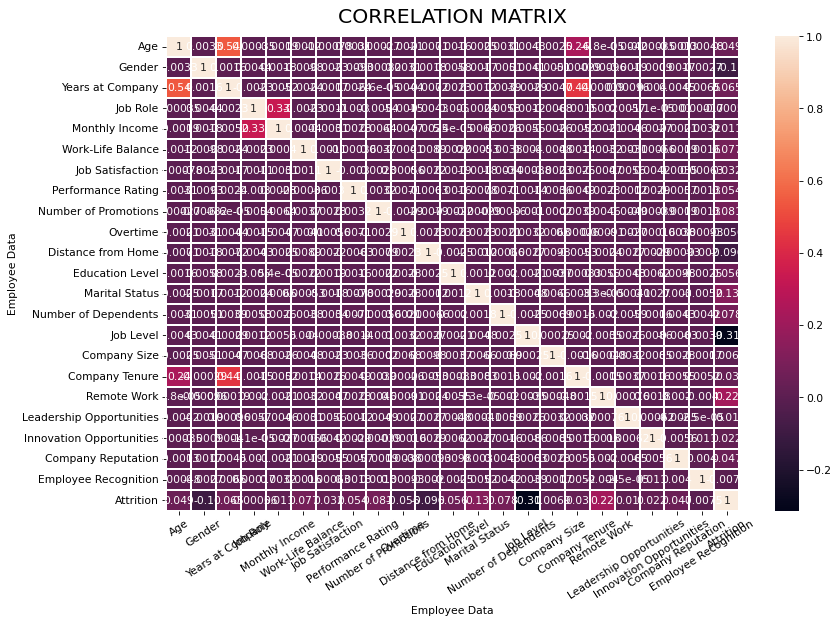

In [242]:
plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Employee Data')
plt.ylabel('Employee Data')
plt.xticks(rotation=33)
plt.show()

<ipython-input-243-a62f46e08d55>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df_copy, palette='viridis')


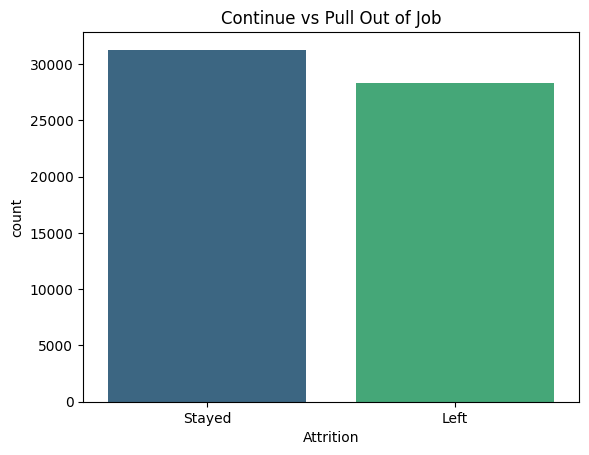

In [243]:
sns.countplot(x='Attrition', data=df_copy, palette='viridis')
plt.title('Continue vs Pull Out of Job')
plt.show()

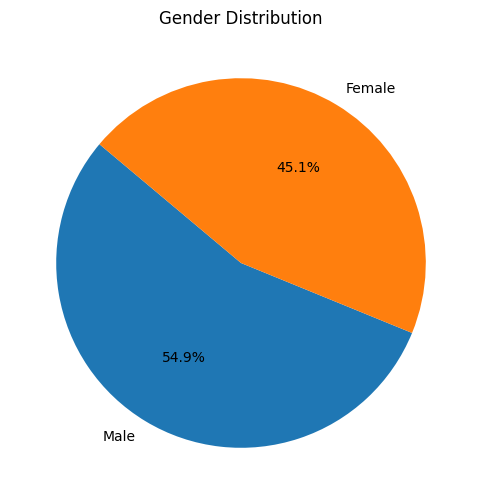

In [244]:
# Counting the number of males and females
gender_counts = df_copy['Gender'].value_counts()
gender_counts

# Create a pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Gender Distribution')

# Show the pie chart
plt.show()

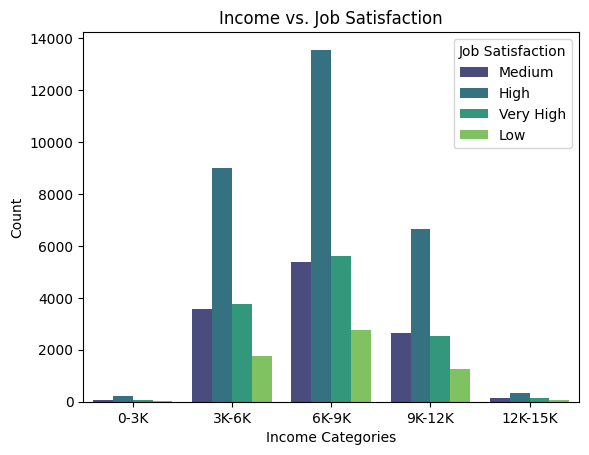

In [245]:
income_bins = pd.cut(df_copy['Monthly Income'], bins=[0, 3000, 6000, 9000, 12000, 15000], labels=['0-3K', '3K-6K', '6K-9K', '9K-12K', '12K-15K'])

# Add the binned 'Income' as a new column to the dataframe
df_copy['Income Category'] = income_bins

# Create a count plot to show the distribution of Job Satisfaction by Income Category
sns.countplot(x='Income Category', hue='Job Satisfaction', data=df_copy, palette='viridis')

plt.title('Income vs. Job Satisfaction')
plt.xlabel('Income Categories')
plt.ylabel('Count')
plt.show()


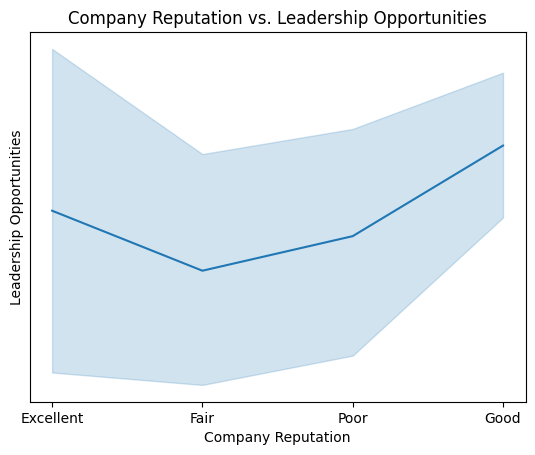

In [246]:
sns.lineplot(x='Company Reputation', y='Leadership Opportunities', data=df_copy)

plt.title('Company Reputation vs. Leadership Opportunities')
plt.xlabel('Company Reputation')
plt.ylabel('Leadership Opportunities')
plt.show()


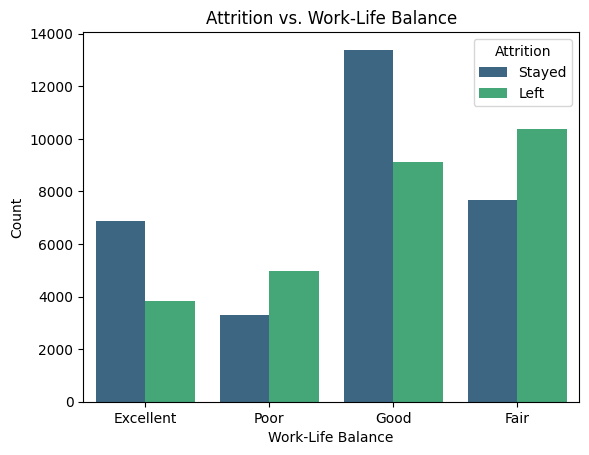

In [247]:
sns.countplot(x='Work-Life Balance', hue='Attrition', data=df_copy, palette='viridis')

plt.title('Attrition vs. Work-Life Balance')
plt.xlabel('Work-Life Balance')
plt.ylabel('Count')
plt.show()


<ipython-input-248-b14afcafe8b8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Company Tenure', y='Innovation Opportunities', data=df_copy, palette='viridis')


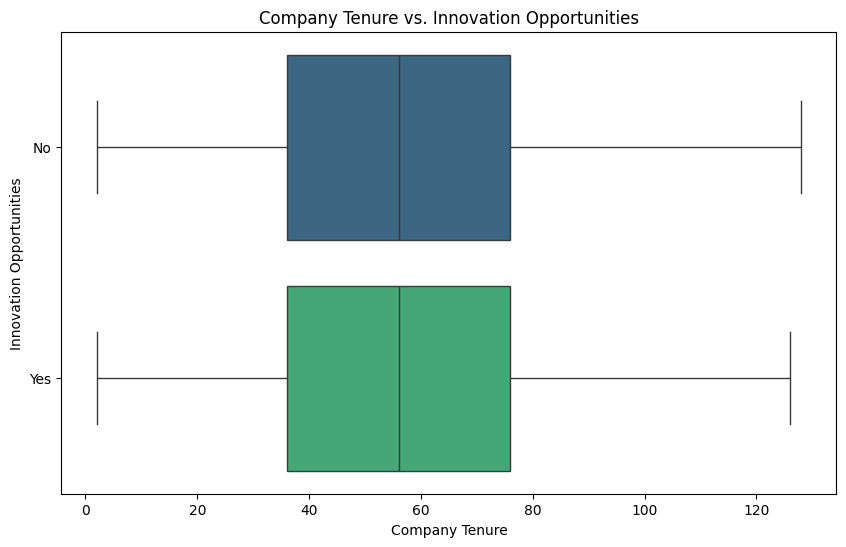

In [248]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Company Tenure', y='Innovation Opportunities', data=df_copy, palette='viridis')
plt.title('Company Tenure vs. Innovation Opportunities')
plt.xlabel('Company Tenure')
plt.ylabel('Innovation Opportunities')
plt.show()

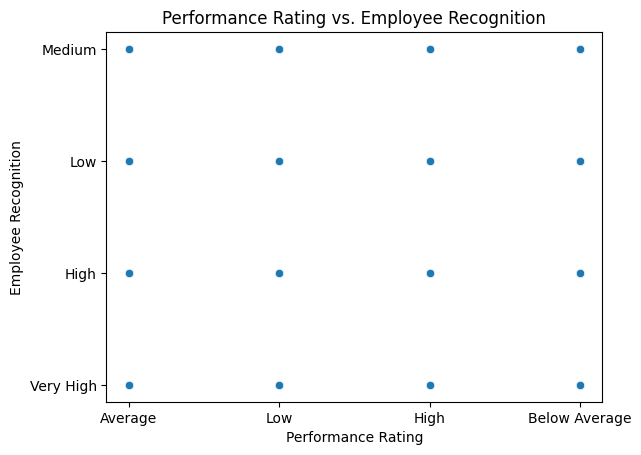

In [249]:
sns.scatterplot(x='Performance Rating', y='Employee Recognition', data=df_copy)

plt.title('Performance Rating vs. Employee Recognition')
plt.xlabel('Performance Rating')
plt.ylabel('Employee Recognition')
plt.show()


In [250]:
X=df.drop(columns=['Attrition'])
Y=df['Attrition']

In [251]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [252]:
from sklearn.linear_model import LogisticRegression

In [253]:
model = LogisticRegression()

model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [254]:
y_pred = model.predict(X_test)

print(y_pred)

[0 1 0 ... 1 0 1]


In [255]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.6428691275167785
Precision: 0.649311789347696
Recall (Sensitivity): 0.6940668479130018
F1-Score: 0.6709438045914818


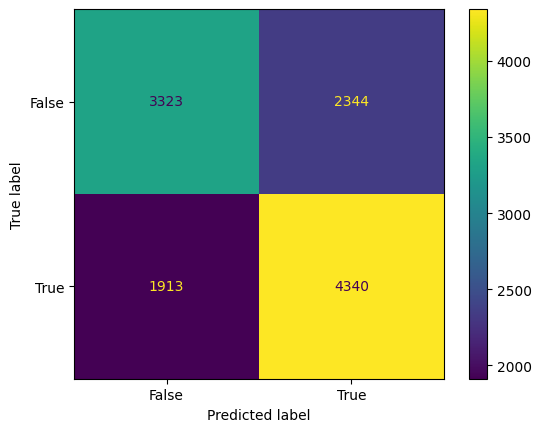

In [256]:
#confuison matrix for titanic dataset
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()